In [1]:
import numpy as np 
import math 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

# file = 'DATA/list10000polyg_N400_seq0001_be0.400_3d_ooo.dat' # angeica
file = '/home/leonardo/LCP_B_WORKDIR/PROJECT_knots/data_extracted/list10000polyg_N400_seq0001_be0.400_3d_ooo.dat' # leonardo
with open (file, "r") as myfile:
    full_data = myfile.readlines()
    
data = list(full_data[39][:-1])
print(data)

['2', '3', '3', '3', '2', '0', '4', '3', '5', '5', '5', '1', '2', '0', '5', '0', '2', '4', '3', '4', '2', '0', '4', '5', '3', '2', '4', '0', '0', '4', '3', '3', '4', '3', '1', '5', '3', '3', '1', '2', '4', '4', '4', '0', '1', '1', '2', '0', '1', '0', '1', '1', '3', '4', '3', '1', '1', '1', '5', '3', '5', '5', '4', '2', '3', '5', '1', '2', '2', '4', '3', '4', '4', '4', '0', '2', '3', '1', '1', '2', '1', '2', '3', '5', '3', '2', '4', '5', '5', '0', '2', '4', '2', '0', '2', '4', '5', '4', '0', '1', '0', '4', '2', '1', '1', '1', '5', '4', '3', '5', '5', '1', '2', '1', '0', '0', '2', '4', '4', '4', '0', '5', '1', '2', '0', '5', '0', '1', '5', '4', '4', '2', '3', '2', '4', '0', '2', '4', '0', '2', '3', '1', '3', '2', '1', '5', '0', '5', '3', '1', '0', '0', '5', '4', '0', '0', '2', '1', '1', '1', '1', '3', '3', '5', '1', '3', '4', '3', '3', '3', '1', '5', '3', '5', '3', '2', '4', '5', '0', '2', '2', '1', '3', '2', '0', '0', '1', '5', '5', '1', '3', '4', '2', '1', '0', '2', '0', '5', '5', '0',

In [3]:
cx, cy, cz = 0, 0, 0
#coordinate di ogni passo
fcx,fcy,fcz = [cx],[cy],[cz]
#coordinate di ogni spigolo
X,Y,Z = [cx],[cy],[cz]

N = len(data)

for i in range(0,N):
    if data[i]=='0':
        cx+=1
    elif data[i]=='1':
        cy+=1
    elif data[i]=='2':
        cz+=1        
    elif data[i]=='3':
        cx-=1
    elif data[i]=='4':
        cy-=1
    elif data[i]=='5':
        cz-=1
        
    fcx.append(cx)
    fcy.append(cy)
    fcz.append(cz)
    
    if i < (N-1) and data[i] != data[i+1]:
        X.append(cx)
        Y.append(cy)
        Z.append(cz)
    
    # solo gli spigoli
    # Anche se non è uno spigolo, l'ultimo punto viene considerato
    # come tale
    if i == (N-1):
        X.append(cx)
        Y.append(cy)
        Z.append(cz)

minx,miny,minz=np.amin(fcx),np.amin(fcy),np.amin(fcz)
fcx = np.array(fcx)
fcy = np.array(fcy)
fcz = np.array(fcz)
fcx += abs(minx)
fcy += abs(miny)
fcz += abs(minz)

minX,minY,minZ=np.amin(X),np.amin(Y),np.amin(Z)
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
X += abs(minX)
Y += abs(minY)
Z += abs(minZ)

if (abs(np.sign(X[1]-X[-1])) + abs(np.sign(Y[1]-Y[-1])) + abs(np.sign(Z[1]-Z[-1])))==1:
    X = X[1:]
    Y = Y[1:]
    Z = Z[1:]

if (abs(np.sign(X[-2]-X[0])) + abs(np.sign(Y[-2]-Y[0])) + abs(np.sign(Z[-2]-Z[0])))==1:
    X = X[:-1]
    Y = Y[:-1]
    Z = Z[:-1]

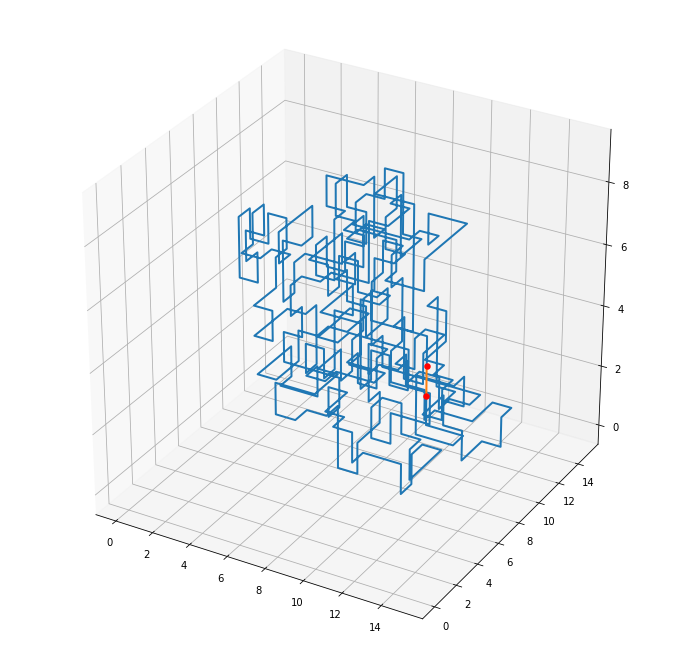

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.plot(fcx, fcy, fcz, lw=2)

ax.scatter(fcx[0], fcy[0], fcz[0], lw=2, c='r')
ax.scatter(fcx[-1], fcy[-1], fcz[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([fcx[0],fcx[-1]], [fcy[0],fcy[-1]], [fcz[0],fcz[-1]], lw=2);

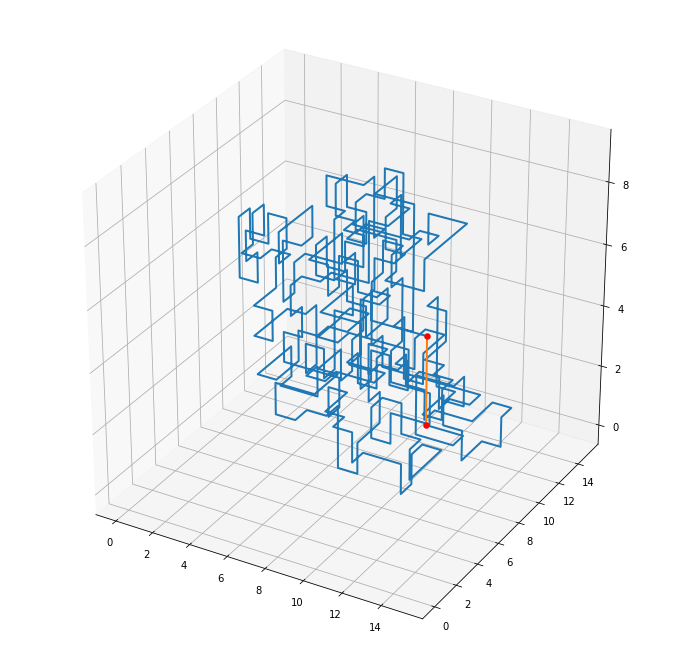

In [5]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( projection='3d')
ax.plot(X, Y, Z, lw=2)

ax.scatter(X[0], Y[0], Z[0], lw=2, c='r')
ax.scatter(X[-1], Y[-1], Z[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([X[0], X[-1]], [Y[0], Y[-1]], [Z[0], Z[-1]], lw=2);

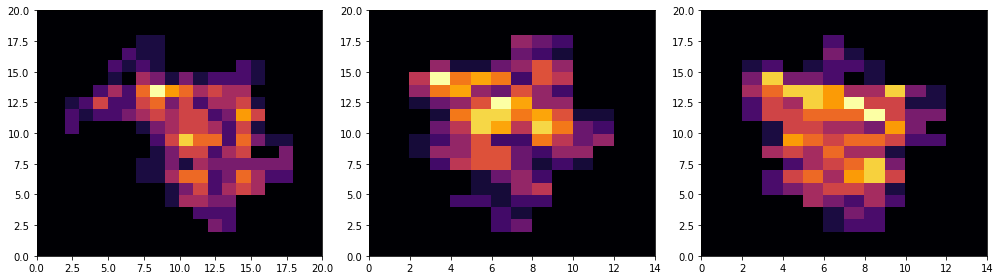

In [6]:
pic2dz = np.zeros(shape=(np.amax(fcx)+5,np.amax(fcy)+5))
pic2dx = np.zeros(shape=(np.amax(fcy)+5,np.amax(fcz)+5))
pic2dy = np.zeros(shape=(np.amax(fcx)+5,np.amax(fcz)+5))

for x,y,z in zip(fcx,fcy,fcz):
    pic2dz[x+2,y+2]+=1
    pic2dx[y+2,z+2]+=1
    pic2dy[x+2,z+2]+=1    

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(14,4))

ax0.pcolor(pic2dz, cmap="inferno")
ax1.pcolor(pic2dx, cmap="inferno")
ax2.pcolor(pic2dy, cmap="inferno")
fig.tight_layout()
plt.show()

In [7]:
def dihedral(p1,p2,p3,p4):
    q1 = np.subtract(p2,p1) # b - a
    q2 = np.subtract(p3,p2) # c - b
    q3 = np.subtract(p4,p3) # d - c
    q1_x_q2 = np.cross(q1,q2)
    q2_x_q3 = np.cross(q2,q3)
    n1 = q1_x_q2/np.sqrt(np.dot(q1_x_q2,q1_x_q2))
    n2 = q2_x_q3/np.sqrt(np.dot(q2_x_q3,q2_x_q3))
    u1 = n2
    u3 = q2/(np.sqrt(np.dot(q2,q2)))
    u2 = np.cross(u3,u1)
    cos_theta = np.dot(n1,u1)
    sin_theta = np.dot(n1,u2)
    theta = -math.atan2(sin_theta,cos_theta) 
    return theta

In [45]:
from math import sqrt, pow

n = len(X)
#matrice delle distanze relative
d=np.zeros(shape=(n, n))
died=np.zeros(shape=(n, n))
#vettore degli elementi indipendenti
d_indep=[]
cross=np.zeros(shape=(n, n))
dot=np.zeros(shape=(n, n))
def edist(x1,y1,z1,x2,y2,z2):
    return sqrt(pow((x1-x2),2) + pow((y1-y2),2) + pow((z1-z2),2))
           
for i in range(0,n):
    for j in range(0,n):
        tdist=edist(X[i],Y[i],Z[i],X[j],Y[j],Z[j])
        d[i,j]=tdist
        j2=j+2
        i2=i+1
        if(i==n-1):
            i2=0
        if j==n-2:
            j2=0
        elif j==n-1:
            j2=1
        
        p1=[X[i-1],Y[i-1],Z[i-1]]
        p2=[X[i],Y[i],Z[i]]
        p3=[X[i2],Y[i2],Z[i2]]
        p4=[X[j2],Y[j2],Z[j2]]
        died[i,j]=dihedral(p1,p2,p3,p4)
        if (i-j)>0:
            d_indep.append(tdist)
        cross[i,j]=np.linalg.norm(np.cross([(X[i]-X[i-1]),(Y[i]-Y[i-1]),(Z[i]-Z[i-1])],[(X[j]-X[j-1]),(Y[j]-Y[j-1]),(Z[j]-Z[j-1])]))  
        dot[i,j]=(np.dot([(X[i]-X[i-1]),(Y[i]-Y[i-1]),(Z[i]-Z[i-1])],[(X[j]-X[j-1]),(Y[j]-Y[j-1]),(Z[j]-Z[j-1])]))

centr_d = d - np.mean(d)
norms_d = np.linalg.norm(centr_d)
std_d = centr_d / norms_d

died=np.nan_to_num(died)

centr_d_indep = d_indep - np.mean(d_indep)
norms_d_indep = np.linalg.norm(centr_d_indep)
std_d_indep = centr_d_indep / norms_d_indep

<ipython-input-44-1a7b8b4a4097>:8: RuntimeWarning: invalid value encountered in true_divide
  n2 = q2_x_q3/np.sqrt(np.dot(q2_x_q3,q2_x_q3))


18.8 s ± 1.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Tentativo di vettorializzazione e cambio funzione diedro

In [47]:
# funzione vettorializzata con metodo di Baiesi
def dihedral(p1,p2,p3,X,Y,Z):
    
    q1 = p2 - p1 # v_(i-1)
    q2 = p3 - p2 # v_i
    # v_j
    # x = [1,2,3]
    # roll(x,-1) -> [2,3,1]
    tx = np.roll(X,-1) - X
    ty = np.roll(Y,-1) - Y
    tz = np.roll(Z,-1) - Z
    
    n = len(tx)
    v_j = np.hstack((tx.reshape(n,1),
                     ty.reshape(n,1),
                     tz.reshape(n,1)))
    # v_j = [[vx1,vy1,vz1], primo vettore
    #        [vx2,vy2,vz2],
    #        ...
    #        [vxn,vyn,vzn]]
    
    # Angolo diedro
    alpha = np.cross(q1,q2)
    alpha_hat = alpha/np.sqrt(np.dot(alpha,alpha))
    
    # norma per ogni riga e reshape per farlo diventare
    # un vettore colonna (serve per broadcasting)
    norm = np.linalg.norm(v_j,axis=1).reshape(n,1)
    
    v_j_hat = v_j/norm
    
    return [alpha.dot(v) for v in v_j_hat]


def edist(x1,y1,z1,X,Y,Z):
    tx = (x1-X)**2
    ty = (y1-Y)**2
    tz = (z1-Z)**2
    return np.sqrt(tx + ty + tz)

In [51]:
n = len(X)
#matrice delle distanze relative
d = np.zeros(shape=(n, n))
died = np.zeros(shape=(n, n))
#vettore degli elementi indipendenti
d_indep = []
cross = np.zeros(shape=(n, n))
dot = np.zeros(shape=(n, n))
           
for i in range(0,n):
    
    # DISTANCE
    d[i,:] = edist(X[i],Y[i],Z[i],X,Y,Z)
    
    # DIHEDRAL
    if i < n-1:
        i2=i+1
    else:
        i2=0  
    p1=np.array([X[i-1],Y[i-1],Z[i-1]])
    p2=np.array([X[i],Y[i],Z[i]])
    p3=np.array([X[i2],Y[i2],Z[i2]])

    died[i,:] = dihedral(p1,p2,p3,X,Y,Z)

In [ ]:
centr_d = d - np.mean(d)
norms_d = np.linalg.norm(centr_d)
std_d = centr_d / norms_d

died=np.nan_to_num(died)

centr_d_indep = d_indep - np.mean(d_indep)
norms_d_indep = np.linalg.norm(centr_d_indep)
std_d_indep = centr_d_indep / norms_d_indep

In [41]:
from sklearn.preprocessing import scale
test = scale(d)
# print(test.mean(axis=0))
# print(test.std(axis=0))
# print(std_d.std(axis=0))

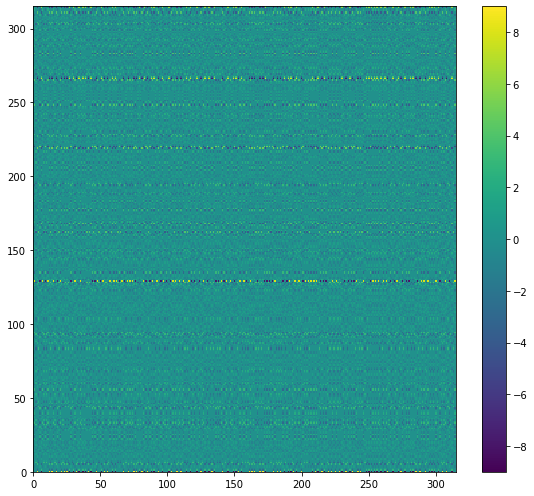

In [52]:
fig, ax= plt.subplots(figsize=(8,7))

c=ax.pcolor(died)
fig.colorbar(c, ax=ax, )
fig.tight_layout()
plt.show()

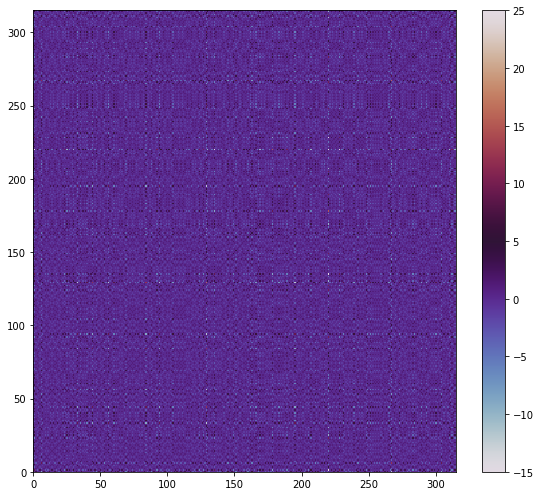

In [31]:
fig, ax= plt.subplots(figsize=(8,7))
c=ax.pcolor(dot, cmap='twilight')
fig.colorbar(c, ax=ax )
fig.tight_layout()
plt.show()

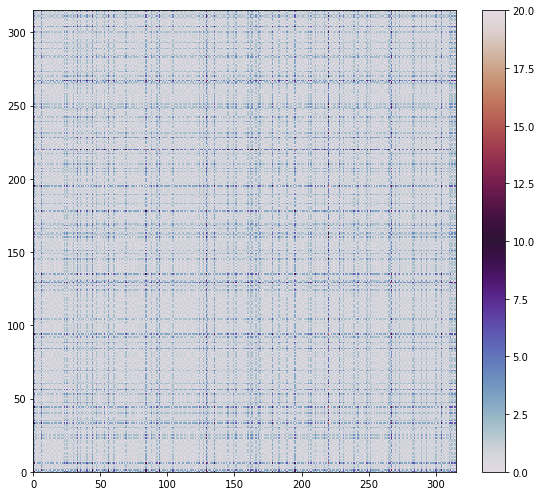

In [32]:
fig, ax= plt.subplots(figsize=(8,7))

c=ax.pcolor(cross,cmap='twilight')
fig.colorbar(c, ax=ax)
fig.tight_layout()
plt.show()

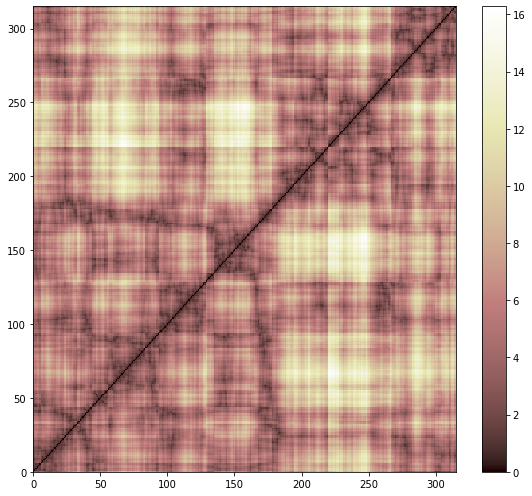

In [41]:
fig, ax= plt.subplots(figsize=(8,7))

c=ax.pcolor(d, cmap="pink")
fig.colorbar(c, ax=ax, )
fig.tight_layout()
plt.show()

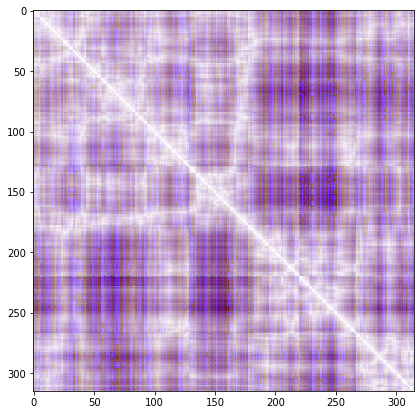

In [34]:
from PIL import Image

size=len(std_d)

arr = np.zeros((4,size,size))
arr[3]=255*(std_d-std_d.min())/(std_d.max()-std_d.min())
arr[1]=255*(cross-cross.min())/(cross.max()-cross.min())
arr[0]=255*(dot-dot.min())/(dot.max()-dot.min())
arr[2]=255*(died-died.min())/(died.max()-died.min())
img = Image.fromarray(arr.T.astype('uint8'))
fig, ax= plt.subplots(figsize=(8,7))
ax.imshow(img);

In [10]:
torsion_angles= []
segment_length=[]
for i in range(0,len(X)):
    
    if (i==len(X)-1):
        i1,i2,i3=0,1,2
    elif (i+1==len(X)-1):
        i1,i2,i3=i+1,0,1
    elif (i+2==len(X)-1):
        i1,i2,i3=i+1,i+2,0
    else:
        i1,i2,i3=i+1,i+2,i+3
    p1=[X[i],Y[i],Z[i]]
    p2=[X[i1],Y[i1],Z[i1]]
    p3=[X[i2],Y[i2],Z[i2]]
    p4=[X[i3],Y[i3],Z[i3]]
    segment_length.append(edist(X[i],Y[i],Z[i],X[i1],Y[i1],Z[i1]))
    torsion_angles.append(dihedral(p1,p2,p3,p4))
print("Possible angles: ", np.unique(torsion_angles))



Possible angles:  [-3.14159265 -1.57079633 -0.          1.57079633]


In [11]:
centr_angles = torsion_angles - np.mean(torsion_angles)
norms = np.linalg.norm(centr_angles, axis=0)
std_angles = centr_angles / norms

print("Standardized possible angles: ", np.unique(std_angles), "\nDevStd =", np.linalg.norm(std_angles), "\nMean =", np.mean(std_angles))

Standardized possible angles:  [-0.08010042 -0.03054413  0.01901216  0.06856845] 
DevStd = 0.9999999999999999 
Mean = 1.3965069492140335e-18


In [12]:
coord_angles=np.full(fill_value=-10,shape=(max(X)+1,max(Y)+1,max(Z)+1))

s=0
for i in range(0, len(torsion_angles)):

    for k in range(0,int(segment_length[i])):
        coord_angles[int(fcx[s+k+i]),int(fcy[s+k+i]),int(fcz[s+k+i])]=torsion_angles[i]
    s=int(s+segment_length[i]-1)


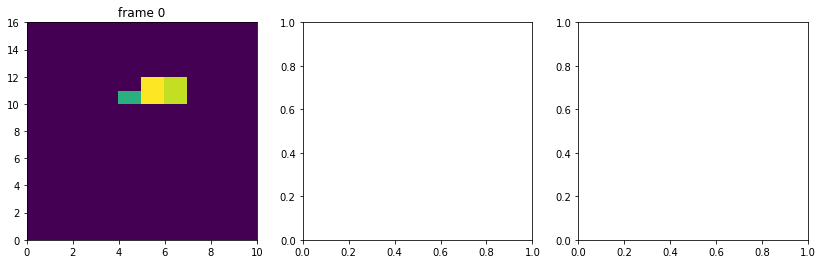

In [121]:
from matplotlib import animation, rc
from IPython.display import clear_output
from time import sleep
#ho provato a fare le animazioni ma con i notebook non vanno, ci sarà il metodo sicuramente ma devo ricercare
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(14,4))
for i in range(np.size(coord_angles,axis=0)):
    ax0.cla()
    ax0.pcolor(coord_angles[i,:,:])
    ax0.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    #sleep(0.1)
    #clear_output(wait=True)
    #plt.pause(0.1)
    plt.show()    
for i in range(np.size(coord_angles,axis=1)):
    ax1.cla()
    ax1.pcolor(coord_angles[:,i,:])
    ax1.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    #sleep(0.1)
    #clear_output(wait=True)
    plt.show()    
for i in range(np.size(coord_angles,axis=2)):
    ax2.cla()
    ax2.pcolor(coord_angles[:,:,i])
    ax2.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    #sleep(0.1)
    #clear_output(wait=True)
    plt.show()    

fig.tight_layout()
